In [87]:
import numpy as np
import pandas as pd
df = pd.read_csv(r"retail sales and promotion roi.csv")
print(df)
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Display the columns
print(df.columns)

# Display the first few rows to understand the structure
df.head()

C:\Users\pranj\AppData\Local\Temp\ipykernel_20736\2666432401.py:3: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"retail sales and promotion roi.csv")


       Actual Quantity (Promo-level)  ActualAvgPrice (Promo-level)  \
0                              28.09                       6.57147   
1                              28.09                       6.57147   
2                               1.04                       6.69000   
3                               2.01                       7.68507   
4                               1.02                       6.99000   
...                              ...                           ...   
134902                     18,863.25                      13.71147   
134903                        902.26                       4.71805   
134904                     20,262.71                      15.08709   
134905                            39                      28.23874   
134906                     26,382.50                      18.47260   

       Avg_Price (Promo-level) Avg_UnitsUplift (Promo-level)  \
0                      6.57147                        -13.08   
1                      6.57147 

,Actual Quantity (Promo-level),ActualAvgPrice (Promo-level),Avg_Price (Promo-level),Avg_UnitsUplift (Promo-level),Avg_Value_sales (Promo-level),AvgBLProfit-System (Promo-level),AvgInvestment-System (Promo-level),BLAvgPrice (Promo-level),BLRev (Promo-level),Brand View Product Name,...,UnitsUplift (Promo-level),Value_Sales (Promo-level),WeightedPullForward (Promo-level),year,flag_2014_2015_halfyear,new system spend _NEGATIVE,vol*ROI,Outlier,brand_view_product_trim,Promo_Flg
0,28.09,6.57147,6.57147,-13.08,184.59,3.94288,0.29155,6.86302,282.51,2075,...,-13.08,184.59,0,"2,012.00",OTHER,8.19,"-20,491.80",N,1176,0
1,28.09,6.57147,6.57147,-13.08,184.59,4.9286,0.29155,6.86302,282.51,2075,...,-13.08,184.59,0,"2,012.00",OTHER,8.19,"-24,912.52",N,1176,0
2,1.04,6.69000,6.69,-2.06,6.96,4.014,5.3,11.99,37.24,2095,...,-2.06,6.96,0,"2,012.00",OTHER,5.52,-260.46,Y,1193,0
3,2.01,7.68507,7.68507,0,15.48,4.61104,0.49114,8.17621,16.5,1675,...,0,15.48,0,"2,012.00",OTHER,0.99,-204.8,Y,872,1
4,1.02,6.99000,6.99,0.02,7.15,4.194,1,7.99,8.01,1711,...,0.02,7.15,0,"2,012.00",OTHER,1.02,-93.54,Y,897,1


In [88]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Actual Quantity (Promo-level)         0
ActualAvgPrice (Promo-level)          0
Avg_Price (Promo-level)               0
Avg_UnitsUplift (Promo-level)         0
Avg_Value_sales (Promo-level)         0
AvgBLProfit-System (Promo-level)      0
AvgInvestment-System (Promo-level)    0
BLAvgPrice (Promo-level)              0
BLRev (Promo-level)                   0
Brand View Product Name               0
Date                                  0
FinalBLQnty (Promo-level)             0
FINALPROMOID                          0
FINALPROMOSUFFIX                      0
FINALPROMOTYPE                        0
IncProfit-System (Promo-level)        0
Investment-System (Promo-level)       0
Lift (Promo-level)                    0
Max_Date                              0
Min_Date                              0
month                                 0
Producer                              0
Product                               0
PromoLength                           0
PromoLif

In [89]:
# Descriptive statistics for numerical features
print(df.describe())

       ActualAvgPrice (Promo-level)  Brand View Product Name   FINALPROMOID  \
count                  1.349070e+05            134907.000000  134907.000000   
mean                   9.169032e+11              1359.769078   25207.454476   
std                    1.453409e+14               691.803429   14426.747780   
min                    3.000000e-01                 1.000000       1.000000   
25%                    5.383030e+00               749.000000   12592.500000   
50%                    7.922490e+00              1540.000000   25552.000000   
75%                    1.188410e+01              1953.000000   37705.000000   
max                    2.830520e+16              2375.000000   49786.000000   

       FINALPROMOSUFFIX          month        Product  PromoLength  \
count     134907.000000  134907.000000  134907.000000     134907.0   
mean         158.947964       6.342139      19.927128          1.0   
std           55.179905       3.620658       7.857711          0.0   
min     

In [90]:
# Strip any leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Check if 'FINALPROMOTYPE' exists and is accessible
print('FINALPROMOTYPE' in df.columns)

True


In [91]:
# Convert relevant columns to numeric, handle any non-numeric entries
df['ActualAvgPrice (Promo-level)'] = pd.to_numeric(df['ActualAvgPrice (Promo-level)'], errors='coerce')
df['Value_Sales (Promo-level)'] = pd.to_numeric(df['Value_Sales (Promo-level)'], errors='coerce')
df['Avg_UnitsUplift (Promo-level)'] = pd.to_numeric(df['Avg_UnitsUplift (Promo-level)'], errors='coerce')
df['AvgInvestment-System (Promo-level)'] = pd.to_numeric(df['AvgInvestment-System (Promo-level)'], errors='coerce')

# Handle missing values by dropping rows with NaN values
df = df.dropna()

# Convert the promotion type column to a categorical type
df['FINALPROMOTYPE'] = df['FINALPROMOTYPE'].astype('category')

In [92]:
# Convert date column to datetime with inferred format
df['Date'] = pd.to_datetime(df['Date'])

# Extract month and year from the date
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

C:\Users\pranj\AppData\Local\Temp\ipykernel_20736\3356558984.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


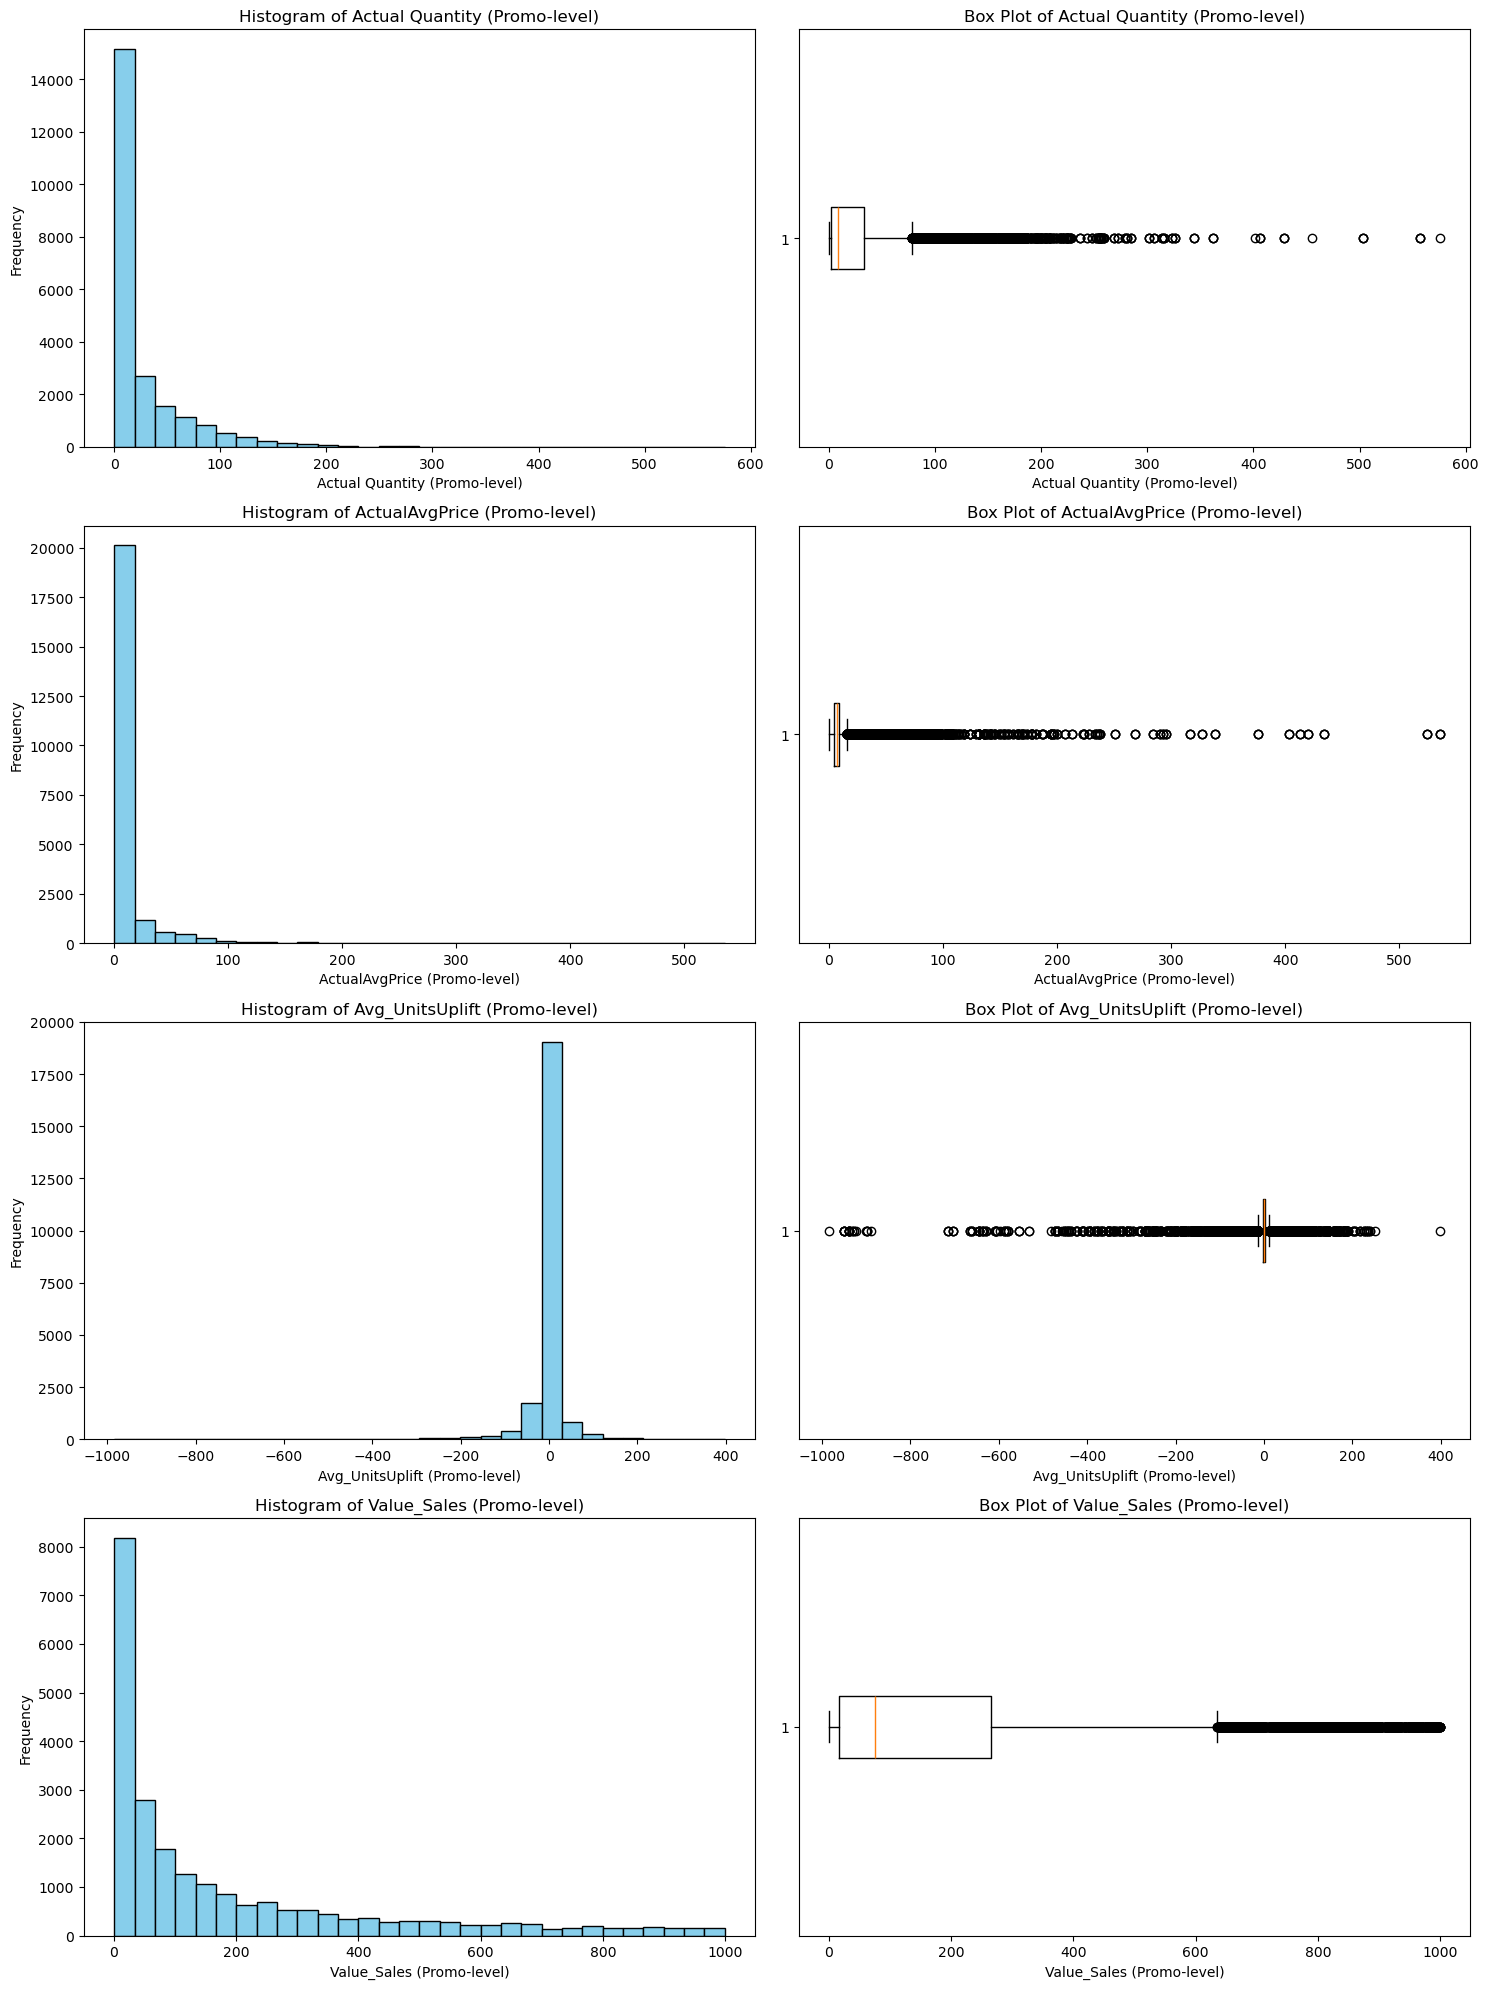

In [95]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure columns are numeric, coercing errors to NaN
for column in columns_to_visualize:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Create histograms and box plots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))

for i, column in enumerate(columns_to_visualize):
    # Histogram
    axes[i, 0].hist(df[column].dropna(), bins=30, color='skyblue', edgecolor='black')
    axes[i, 0].set_title(f'Histogram of {column}')
    axes[i, 0].set_xlabel(column)
    axes[i, 0].set_ylabel('Frequency')
    
    # Box plot
    axes[i, 1].boxplot(df[column].dropna(), vert=False)
    axes[i, 1].set_title(f'Box Plot of {column}')
    axes[i, 1].set_xlabel(column)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
# Create dummy variables for the promotion type
df = pd.get_dummies(df, columns=['FINALPROMOTYPE'])

# Select features and target variable
features = df[['ActualAvgPrice (Promo-level)', 'Avg_UnitsUplift (Promo-level)', 'AvgInvestment-System (Promo-level)', 'Month', 'Year'] + list(df.columns[df.columns.str.startswith('FINALPROMOTYPE')])]
target = df['Value_Sales (Promo-level)']

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Example with GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)
print(f'GradientBoostingRegressor - Mean Squared Error: {mse_gbr}')
print(f'GradientBoostingRegressor - R-squared: {r2_gbr}')

# Example with Ridge Regression
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f'Ridge Regression - Mean Squared Error: {mse_ridge}')
print(f'Ridge Regression - R-squared: {r2_ridge}')

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Train a Random Forest model to check feature importance
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(features, target)

# Get feature importances
importances = model.feature_importances_
feature_names = features.columns
sorted_indices = np.argsort(importances)[::-1]

# Print feature importances
for idx in sorted_indices:
    print(f'{feature_names[idx]}: {importances[idx]}')

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

# Model evaluation
y_pred = gbr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'GradientBoostingRegressor - Mean Squared Error: {mse}')
print(f'GradientBoostingRegressor - R-squared: {r2}')


In [ ]:
import datetime

# Create future dates from August 2015 to March 2016
future_dates = pd.date_range(start='2015-08-01', periods=8, freq='MS')

# Create a new DataFrame for prediction with correct feature names
future_data_type1 = pd.DataFrame({
    'ActualAvgPrice (Promo-level)': [6.5] * 8,
    'Avg_UnitsUplift (Promo-level)': [-2] * 8,
    'AvgInvestment-System (Promo-level)': [0.5] * 8,
    'Month': future_dates.month,
    'Year': future_dates.year,
    'FINALPROMOTYPE_Type 1 Promo': [1] * 8,  # All entries are Promotion Type 1
    'FINALPROMOTYPE_Type 2 Promo': [0] * 8,  # No entries for Promotion Type 2
    # Add other dummy variables if there are more types
})

future_data_type2 = pd.DataFrame({
    'ActualAvgPrice (Promo-level)': [6.5] * 8,
    'Avg_UnitsUplift (Promo-level)': [-2] * 8,
    'AvgInvestment-System (Promo-level)': [0.5] * 8,
    'Month': future_dates.month,
    'Year': future_dates.year,
    'FINALPROMOTYPE_Type 1 Promo': [0] * 8,  # No entries for Promotion Type 1
    'FINALPROMOTYPE_Type 2 Promo': [1] * 8,  # All entries are Promotion Type 2
    # Add other dummy variables if there are more types
})

# Ensure all columns used in training are present in the new data
missing_cols = set(features.columns) - set(future_data_type1.columns)
for col in missing_cols:
    future_data_type1[col] = 0
    future_data_type2[col] = 0

# Reorder the columns to match the training data
future_data_type1 = future_data_type1[features.columns]
future_data_type2 = future_data_type2[features.columns]

# Scale future data
scaled_future_data_type1 = scaler.transform(future_data_type1)
scaled_future_data_type2 = scaler.transform(future_data_type2)

In [ ]:
# Make predictions
predictions_type1 = model.predict(future_data_type1)
predictions_type2 = model.predict(future_data_type2)

# Combine the results into a DataFrame
results = pd.DataFrame({
    'Month': future_dates.month,
    'Year': future_dates.year,
    'Predicted Sales Type 1': predictions_type1,
    'Predicted Sales Type 2': predictions_type2
})

# Determine the better promotion type for each month
results['Better Promotion'] = results.apply(lambda row: 'Type 1' if row['Predicted Sales Type 1'] > row['Predicted Sales Type 2'] else 'Type 2', axis=1)

print(results)

In [ ]:
import matplotlib.pyplot as plt

# Create a line graph for predicted sales
plt.figure(figsize=(12, 6))

# Plot the predicted sales for both promotion types
plt.plot(results['Month'].astype(str) + '-' + results['Year'].astype(str), results['Predicted Sales Type 1'], label='Predicted Sales Type 1', marker='o')
plt.plot(results['Month'].astype(str) + '-' + results['Year'].astype(str), results['Predicted Sales Type 2'], label='Predicted Sales Type 2', marker='o')

# Adding labels and title
plt.xlabel('Month-Year')
plt.ylabel('Predicted Sales')
plt.title('Predicted Sales for Different Promotion Types Over Next 8 Months')
plt.legend()
plt.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()